<a href="https://colab.research.google.com/github/dxk613/COVIDPortfolioProjects/blob/main/EDA_Bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on research from the World Bank as well as DataDive and IMF's focus on gender finance to address climate inequity, we will perform initial EDA to gain insights of women's participation in some of the key areas within Bangladesh's government: climate change, education, agriculture, water resources, and textiles and jutes. https://bangladeshembassy.ru/economy-trade-investment/overview-of-bangladesh-economy/

Here is the pdf file that I've been using to extract different tables and perform data visualization with: https://mof.portal.gov.bd/sites/default/files/files/mof.portal.gov.bd/budget_mof/001130ba_9cb8_4955_9f07_f9ba27ca7de9/Gender%20Budget%20Report%202023-24%20(English%20for%20Website).pdf

In [ ]:
!pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 28.2 MB/s eta 0:00:00


In [ ]:
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tabula import read_pdf

Number of Govt. Employees for Ministry of Environment/Climate Change

In [ ]:
pdf_file_path = 'https://mof.portal.gov.bd/sites/default/files/files/mof.portal.gov.bd/budget_mof/001130ba_9cb8_4955_9f07_f9ba27ca7de9/Gender%20Budget%20Report%202023-24%20(English%20for%20Website).pdf'
table_df = tabula.read_pdf(pdf_file_path, pages=184)[1]

In [ ]:
table_df.head()

,Office name,Unnamed: 0,Total,Unnamed: 1,Male,Unnamed: 2,Female,Unnamed: 3,Female Percentage,Unnamed: 4
0,"Ministry of Environment, Forests and Climate C...",164,130,34,20.7,NaN,NaN,NaN,NaN,NaN
1,Department of Environment,572,476,98,17.1,NaN,NaN,NaN,NaN,NaN
2,Forest Department,"6,883","6,665",218,3.2,NaN,NaN,NaN,NaN,NaN
3,Bangladesh National Herbarium,38,30,8,21.0,NaN,NaN,NaN,NaN,NaN
4,Bangladesh Forest Research Institute,400,366,34,9.3,NaN,NaN,NaN,NaN,NaN


In [ ]:
table_df.shape

(8, 10)

In [ ]:
table_df.dtypes

Office name           object
Unnamed: 0            object
Total                 object
Unnamed: 1             int64
Male                 float64
Unnamed: 2           float64
Female               float64
Unnamed: 3           float64
Female Percentage    float64
Unnamed: 4           float64
dtype: object

In [ ]:
table_df.columns

Index(['Office name', 'Unnamed: 0', 'Total', 'Unnamed: 1', 'Male',
       'Unnamed: 2', 'Female', 'Unnamed: 3', 'Female Percentage',
       'Unnamed: 4'],
      dtype='object')

In [ ]:
# List of column names to remove
columns_to_remove = ['Unnamed: 2', 'Female','Unnamed: 3', 'Female Percentage',
                    'Unnamed: 4']

# Remove the specified columns
table_df = table_df.drop(columns=columns_to_remove)

# List of column names to replace
column_mapping = {
    'Unnamed: 0': 'Total',
    'Total': 'Male',
    'Unnamed: 1': 'Female',
    'Male': 'Female Percentage'
}

table_df.rename(columns=column_mapping, inplace=True)


In [ ]:
table_df.head()

,Office name,Total,Male,Female,Female Percentage
0,"Ministry of Environment, Forests and Climate C...",164,130,34,20.7
1,Department of Environment,572,476,98,17.1
2,Forest Department,"6,883","6,665",218,3.2
3,Bangladesh National Herbarium,38,30,8,21.0
4,Bangladesh Forest Research Institute,400,366,34,9.3


In [ ]:
table_df['Total'] = table_df['Total'].str.replace(',', '').astype(int)
table_df['Male'] = table_df['Male'].str.replace(',', '').astype(int)
table_df['Female'] = table_df['Female'].astype(int)

In [ ]:
table_df.dtypes

Office name           object
Total                  int64
Male                   int64
Female                 int64
Female Percentage    float64
dtype: object

In [ ]:
table_df.columns

Index(['Office name', 'Total', 'Male', 'Female', 'Female Percentage'], dtype='object')

In [ ]:
table_df['Office name'] = table_df['Office name'].astype(str)

In [ ]:
df = pd.DataFrame(table_df)

In [ ]:
df['Male Percentage'] = 100 - df['Female Percentage']

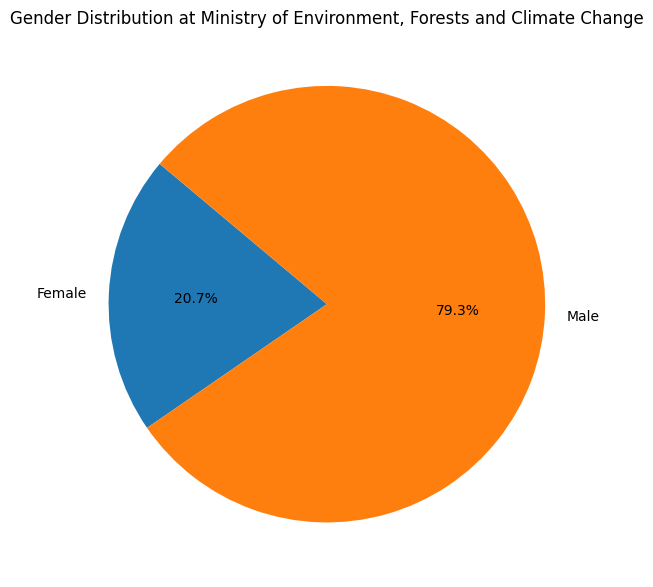

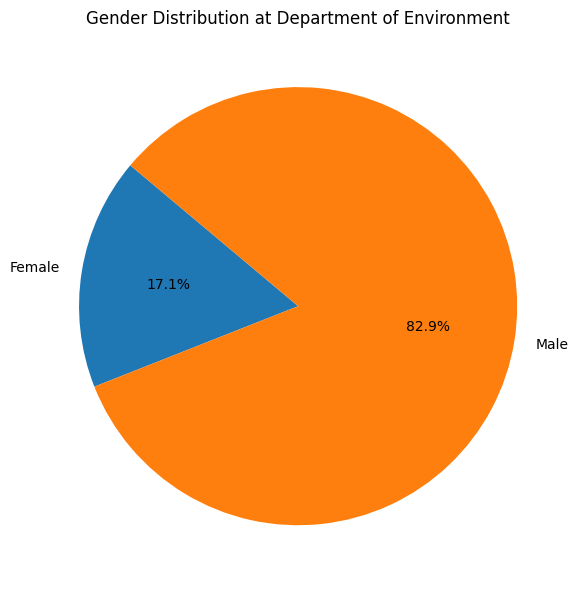

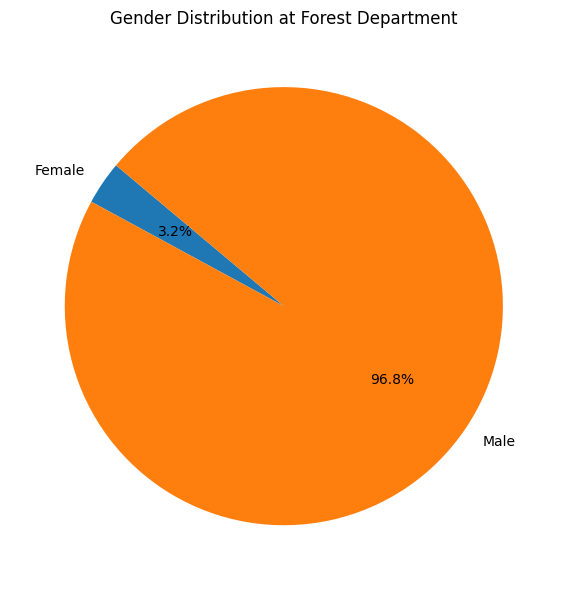

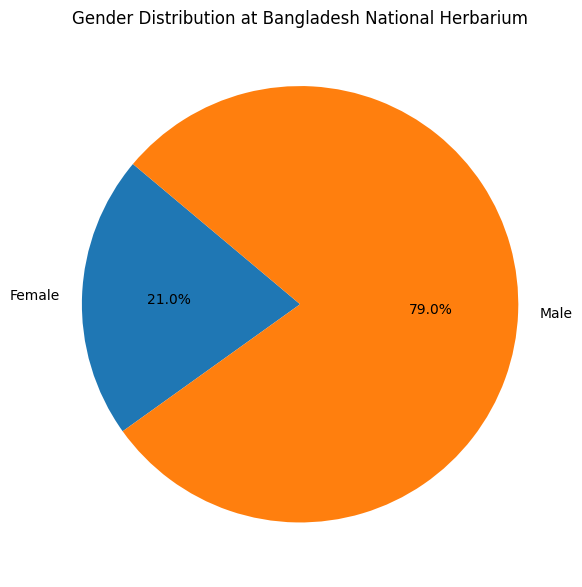

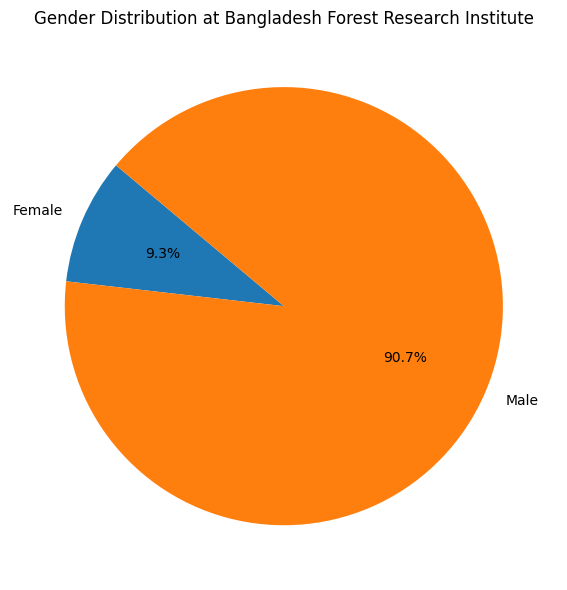

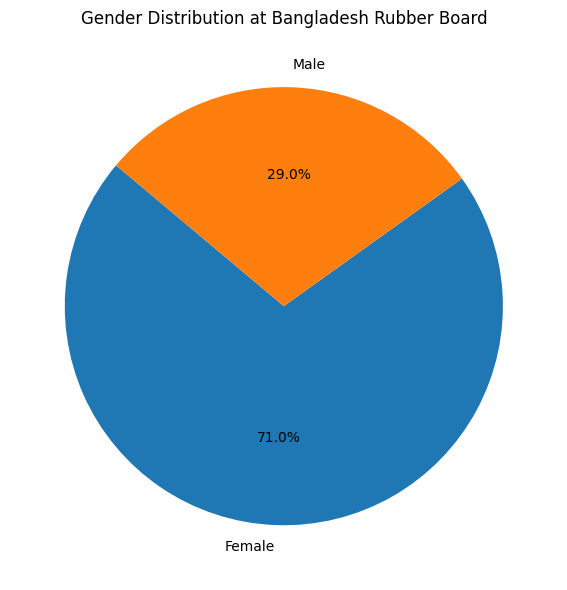

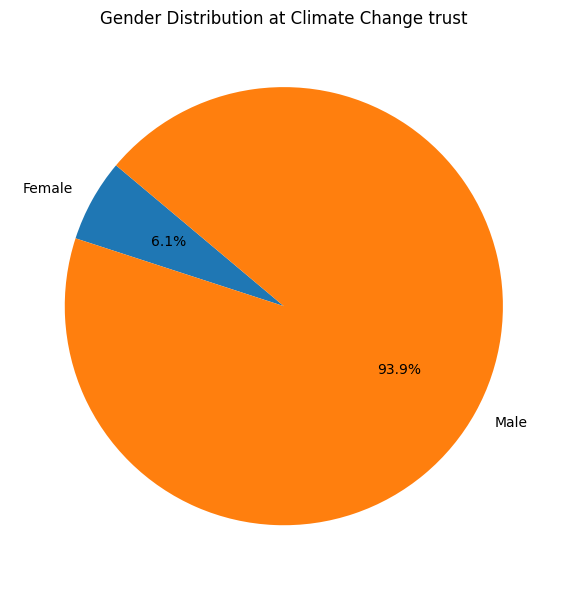

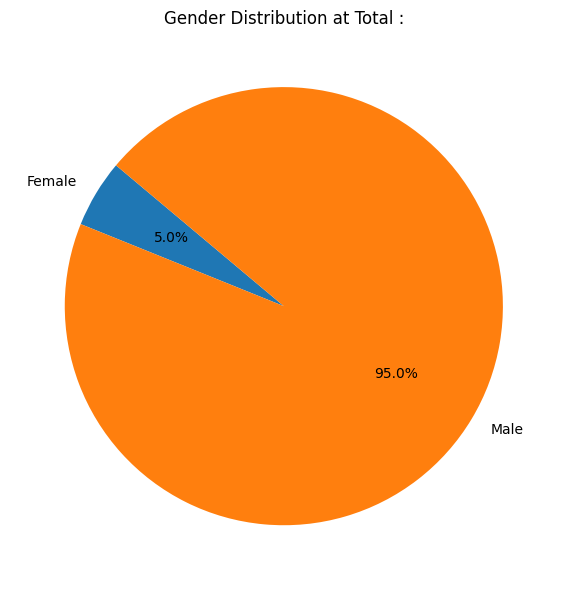

In [ ]:
for index, row in df.iterrows():
    office_name = row['Office name']
    female_percentage = row['Female Percentage']
    male_percentage = row['Male Percentage']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([female_percentage, male_percentage], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution at {office_name}')

    # Display the chart
    plt.tight_layout()
    plt.show()

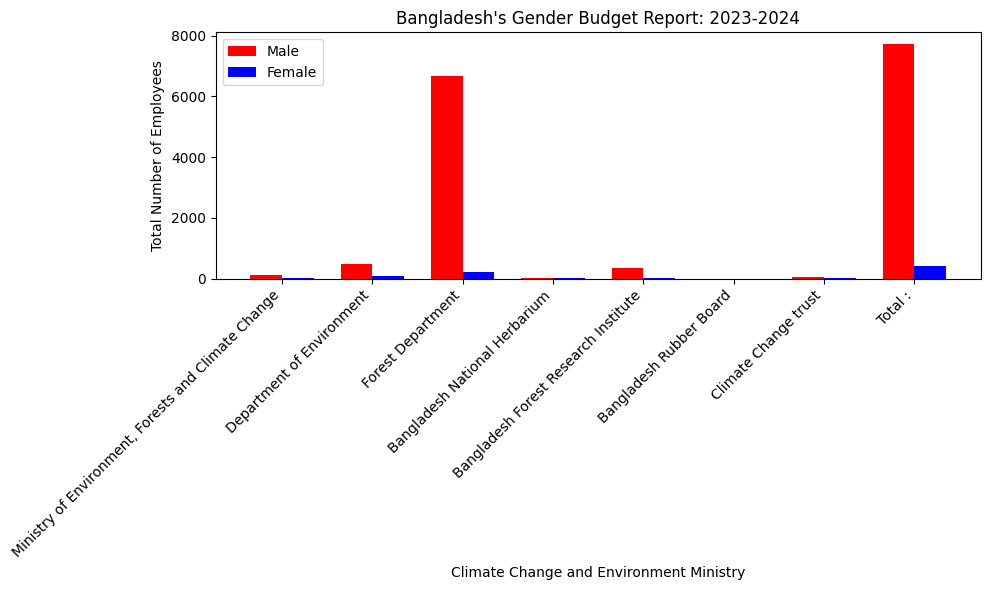

In [ ]:
# Define the positions for the bars
x = np.arange(len(df['Office name']))

# Define the width of each bar group
width = 0.35

# Create a bar chart with Male and Female bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Male'], width, label='Male', color='red')
bar2 = ax.bar(x + width/2, df['Female'], width, label='Female', color='blue')

# Add labels and a title
ax.set_xlabel('Climate Change and Environment Ministry')
ax.set_ylabel('Total Number of Employees')
ax.set_title("Bangladesh's Gender Budget Report: 2023-2024")

# Add a legend
ax.legend()

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['Office name'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


Number of Govt. Employees for Education Ministry/Division - page 35

In [ ]:
table_df1 = tabula.read_pdf(pdf_file_path, pages=35)[0]

In [ ]:
table_df1.shape

(8, 10)

In [ ]:
table_df1.head()

,Office name,Unnamed: 0,Total,Unnamed: 1,Male,Unnamed: 2,Female,Unnamed: 3,Female Percentage,Unnamed: 4
0,Secretariat,97,79,18,18.6,NaN,NaN,NaN,NaN,NaN
1,Department of Primary Education,"6,197","5,161","1,036",16.7,NaN,NaN,NaN,NaN,NaN
2,Compulsory Primary Education Implementation,39,35,4,10.৩,NaN,NaN,NaN,NaN,NaN
3,Monitoring Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bureau of Non-Formal Education,214,187,27,11.6,NaN,NaN,NaN,NaN,NaN


In [ ]:
table_df1.dtypes

Office name           object
Unnamed: 0            object
Total                 object
Unnamed: 1            object
Male                  object
Unnamed: 2           float64
Female               float64
Unnamed: 3           float64
Female Percentage    float64
Unnamed: 4           float64
dtype: object

In [ ]:
last_row = table_df1.iloc[-1]

In [ ]:
print(last_row)

Office name          Total :
Unnamed: 0             7,772
Total                  5,992
Unnamed: 1             1,780
Male                    22.9
Unnamed: 2               NaN
Female                   NaN
Unnamed: 3               NaN
Female Percentage        NaN
Unnamed: 4               NaN
Name: 7, dtype: object


In [ ]:
# List of column names to remove
columns_to_remove = ['Unnamed: 2', 'Female','Unnamed: 3', 'Female Percentage',
                    'Unnamed: 4']

# Remove the specified columns
table_df1 = table_df1.drop(columns=columns_to_remove)

# List of column names to replace
column_mapping = {
    'Unnamed: 0': 'Total',
    'Total': 'Male',
    'Unnamed: 1': 'Female',
    'Male': 'Female Percentage'
}

table_df1.rename(columns=column_mapping, inplace=True)

In [ ]:
table_df1.head()

,Office name,Total,Male,Female,Female Percentage
0,Secretariat,97,79,18,18.6
1,Department of Primary Education,"6,197","5,161","1,036",16.7
2,Compulsory Primary Education Implementation,39,35,4,10.৩
3,Monitoring Unit,NaN,NaN,NaN,NaN
4,Bureau of Non-Formal Education,214,187,27,11.6


In [ ]:
df = pd.DataFrame(table_df1)

In [ ]:
df.shape

(8, 5)

In [ ]:
df = df.drop(index=3)

In [ ]:
df.head()

,Office name,Total,Male,Female,Female Percentage
0,Secretariat,97,79,18,18.6
1,Department of Primary Education,"6,197","5,161","1,036",16.7
2,Compulsory Primary Education Implementation,39,35,4,10.৩
4,Bureau of Non-Formal Education,214,187,27,11.6
5,National Academy for Primary Education,57,48,9,15.৮


In [ ]:
df.shape

(7, 5)

In [ ]:
df['Total'] = df['Total'].str.replace(',', '').astype(int)
df['Male'] = df['Male'].str.replace(',', '').astype(int)
df['Female'] = df['Female'].str.replace(',', '').astype(int)

In [ ]:
df['Office name'] = df['Office name'].astype('string')

In [ ]:
df['Female Percentage'] = df['Female Percentage'].str.replace('৩', '0')
df['Female Percentage'] = df['Female Percentage'].str.replace('৮', '0')

In [ ]:
df['Female Percentage'] = df['Female Percentage'].astype(float)

In [ ]:
df.dtypes

Office name           string
Total                  int64
Male                   int64
Female                 int64
Female Percentage    float64
dtype: object

In [ ]:
df.head()

,Office name,Total,Male,Female,Female Percentage
0,Secretariat,97,79,18,18.6
1,Department of Primary Education,6197,5161,1036,16.7
2,Compulsory Primary Education Implementation,39,35,4,10.0
4,Bureau of Non-Formal Education,214,187,27,11.6
5,National Academy for Primary Education,57,48,9,15.0


In [ ]:
df['Male Percentage'] = 100 - df['Female Percentage']

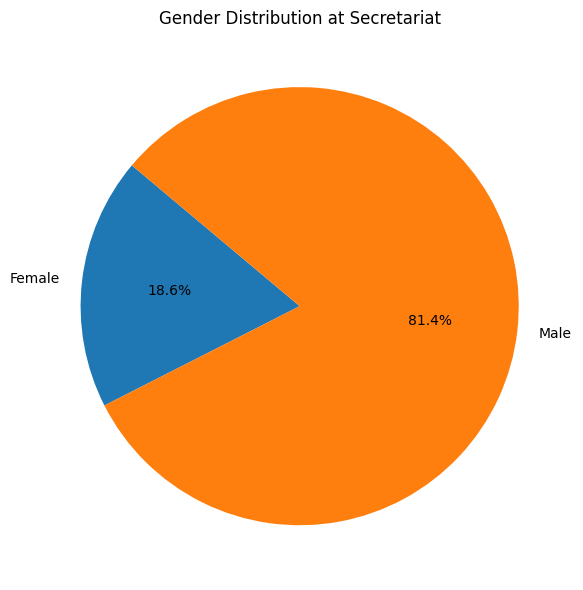

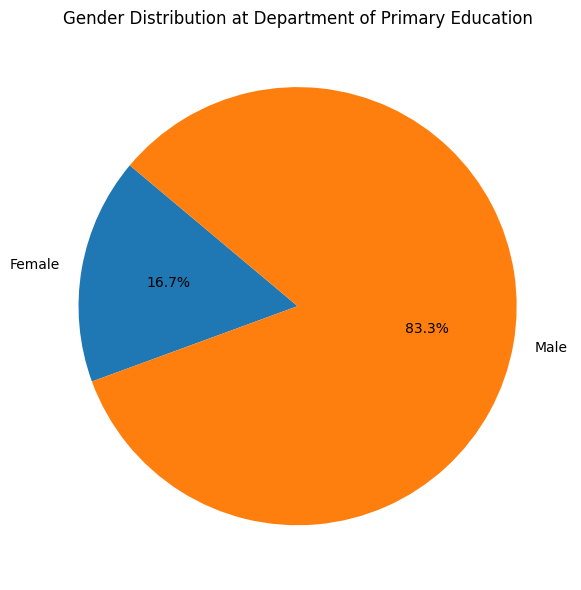

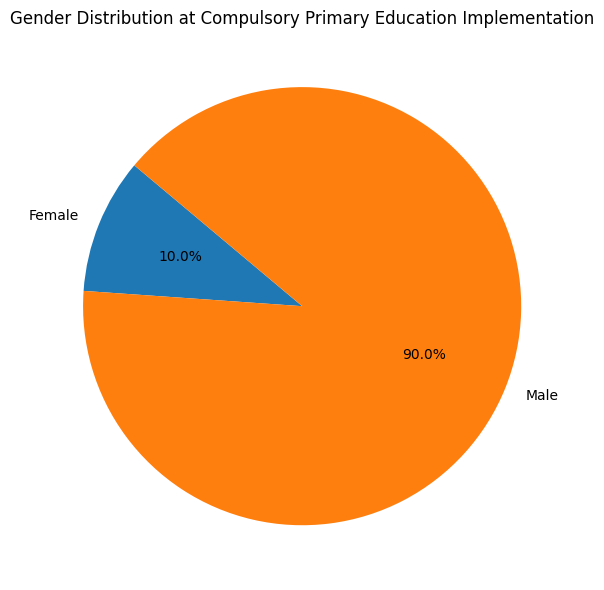

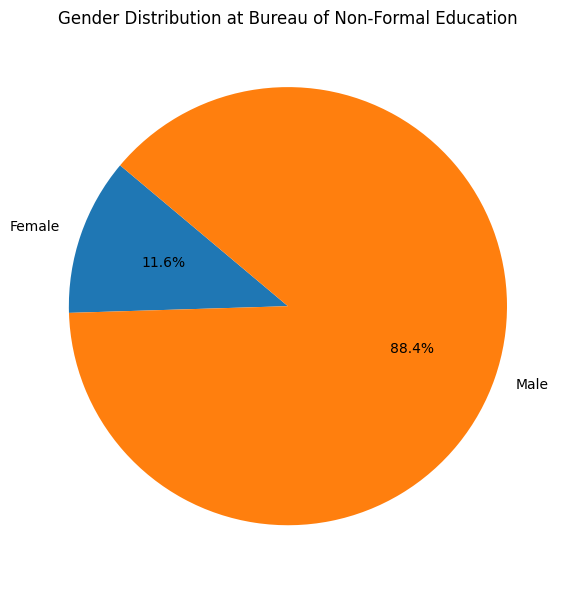

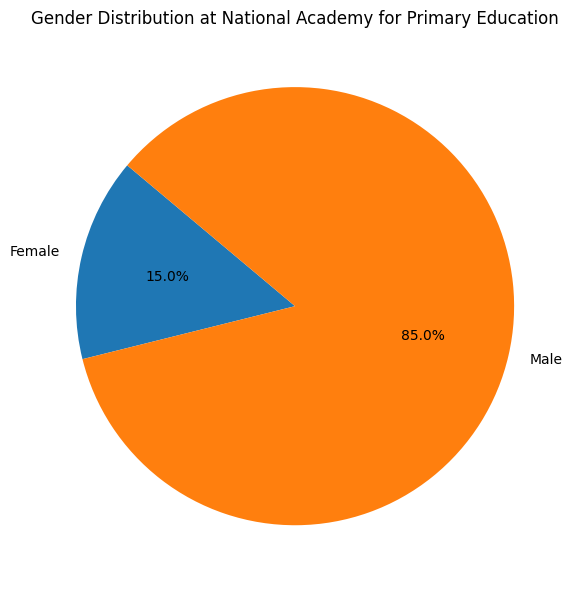

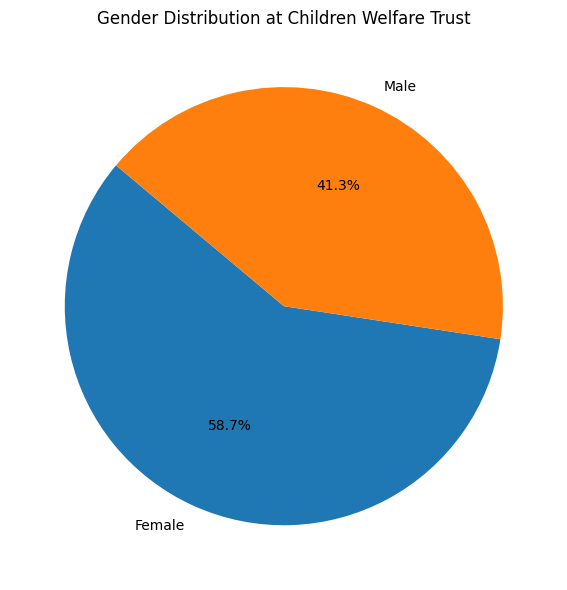

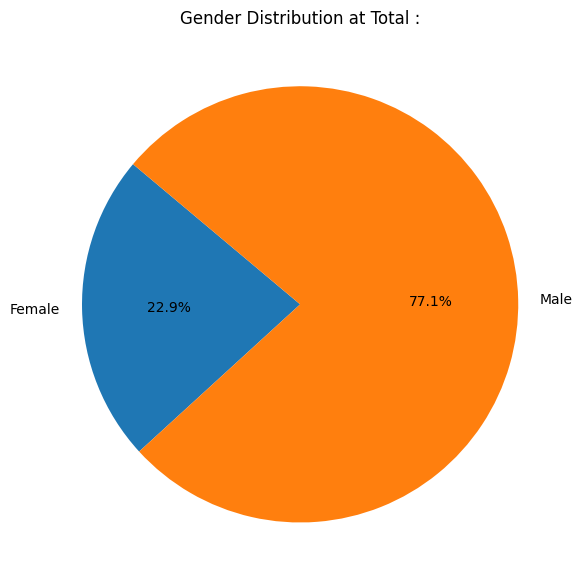

In [ ]:
for index, row in df.iterrows():
    office_name = row['Office name']
    female_percentage = row['Female Percentage']
    male_percentage = row['Male Percentage']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([female_percentage, male_percentage], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution at {office_name}')

    # Display the chart
    plt.tight_layout()
    plt.show()

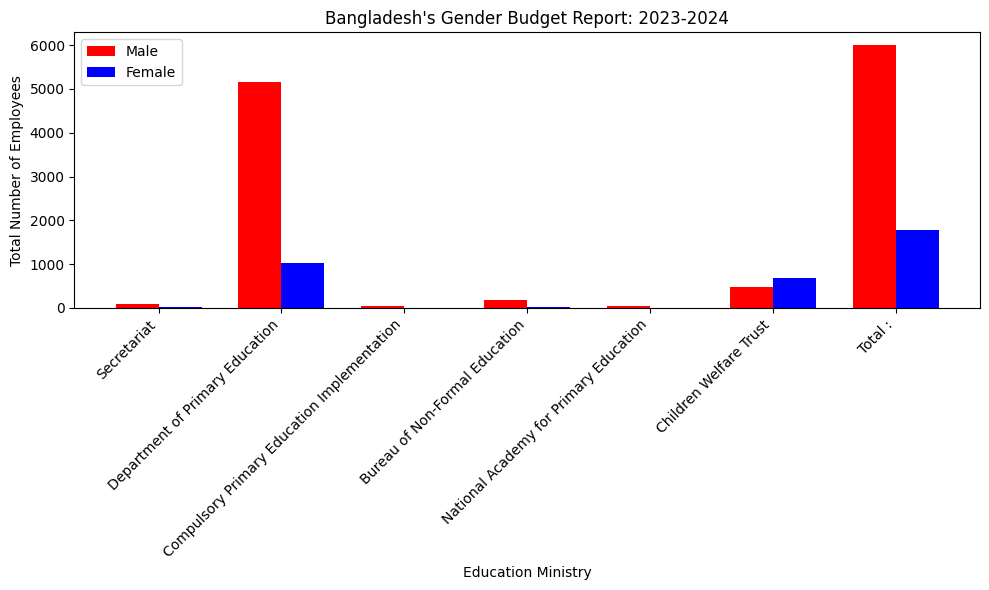

In [ ]:
# Define the positions for the bars
x = np.arange(len(df['Office name']))

# Define the width of each bar group
width = 0.35

# Create a bar chart with Male and Female bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Male'], width, label='Male', color='red')
bar2 = ax.bar(x + width/2, df['Female'], width, label='Female', color='blue')

# Add labels and a title
ax.set_xlabel('Education Ministry')
ax.set_ylabel('Total Number of Employees')
ax.set_title("Bangladesh's Gender Budget Report: 2023-2024")

# Add a legend
ax.legend()

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['Office name'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

Number of Govt. Employees for Agriculture - page 65

In [ ]:
table_df2 = tabula.read_pdf(pdf_file_path, pages=65)[0]

In [ ]:
table_df2.shape

(10, 7)

In [ ]:
table_df2.head()

,Unnamed: 0,Office name,Unnamed: 1,Total,Male,Female,Female Percentage
0,Secretariat,NaN,NaN,218,167,51,23.4
1,Department of Agricultural Extension,NaN,NaN,"18,871","16,181","2,690",14.3
2,Seed Certification Agency,NaN,NaN,303,237,66,21.8
3,Cotton Development Board,NaN,NaN,530,474,56,10.6
4,Agricultural Information Service,NaN,NaN,223,189,34,15.2


In [ ]:
# List of column names to remove
columns_to_remove = ['Office name','Unnamed: 1']

# Remove the specified columns
table_df2 = table_df2.drop(columns=columns_to_remove)

# List of column names to replace
column_mapping = {
    'Unnamed: 0': 'Office name'}

table_df2.rename(columns=column_mapping, inplace=True)


In [ ]:
table_df2.dtypes

Office name           object
Total                 object
Male                  object
Female                object
Female Percentage    float64
dtype: object

In [ ]:
table_df2.shape

(10, 5)

In [ ]:
table_df2['Total'] = table_df2['Total'].str.replace(',', '').astype(int)
table_df2['Male'] = table_df2['Male'].str.replace(',', '').astype(int)
table_df2['Female'] = table_df2['Female'].str.replace(',', '').astype(int)

In [ ]:
table_df2.head()

,Office name,Total,Male,Female,Female Percentage
0,Secretariat,218,167,51,23.4
1,Department of Agricultural Extension,18871,16181,2690,14.3
2,Seed Certification Agency,303,237,66,21.8
3,Cotton Development Board,530,474,56,10.6
4,Agricultural Information Service,223,189,34,15.2


In [ ]:
table_df2['Office name'] = table_df2['Office name'].astype('string')

In [ ]:
table_df2.dtypes

Office name           string
Total                  int64
Male                   int64
Female                 int64
Female Percentage    float64
dtype: object

In [ ]:
df = pd.DataFrame(table_df2)

In [ ]:
last_row = df.iloc[-1]

In [ ]:
print(last_row)

Office name           <NA>
Total                29472
Male                 25301
Female                4191
Female Percentage     14.2
Name: 9, dtype: object


In [ ]:
df['Office name'] = df['Office name'].fillna('Total')

In [ ]:
last_row = df.iloc[-1]
print(last_row)

Office name          Total
Total                29472
Male                 25301
Female                4191
Female Percentage     14.2
Name: 9, dtype: object


In [ ]:
df.dtypes

Office name           string
Total                  int64
Male                   int64
Female                 int64
Female Percentage    float64
dtype: object

-------------FRANCES TRYING SOMETHING------------------------

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Office name        10 non-null     string 
 1   Total              10 non-null     int64  
 2   Male               10 non-null     int64  
 3   Female             10 non-null     int64  
 4   Female Percentage  10 non-null     float64
 5   Male Percentage    10 non-null     float64
dtypes: float64(2), int64(3), string(1)
memory usage: 608.0 bytes


In [ ]:
df.isna().sum()

Office name          0
Total                0
Male                 0
Female               0
Female Percentage    0
Male Percentage      0
dtype: int64

In [ ]:
df['Office name']

0                               Secretariat
1      Department of Agricultural Extension
2                 Seed Certification Agency
3                  Cotton Development Board
4          Agricultural Information Service
5      Department of Agricultural Marketing
6       Soil Resource Development Institute
7    National Agricultural Training Academy
8                   Autonomous institutions
9                                     Total
Name: Office name, dtype: string

--------------------------------END--------------------------------

In [ ]:
df['Male Percentage'] = 100 - df['Female Percentage']

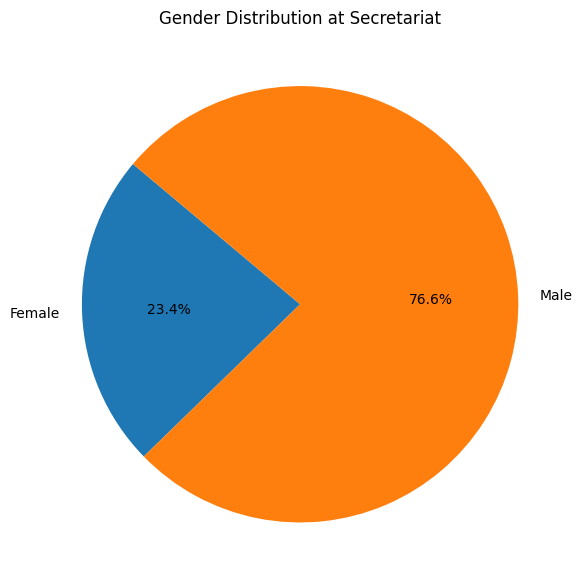

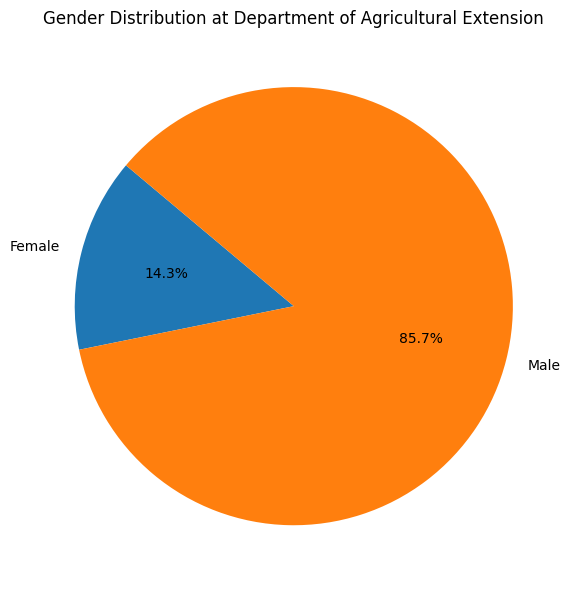

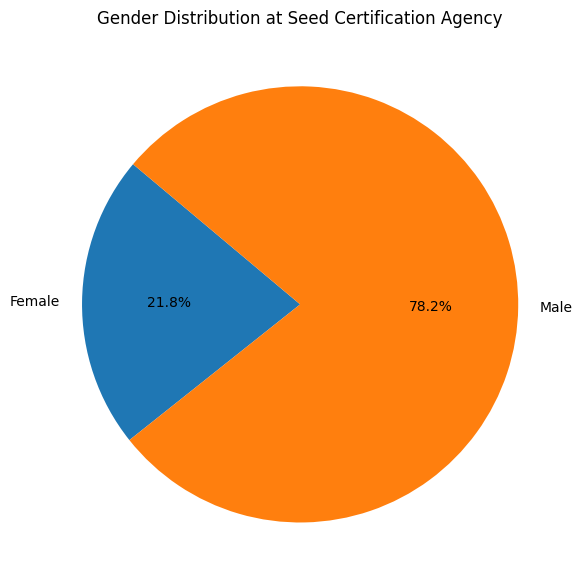

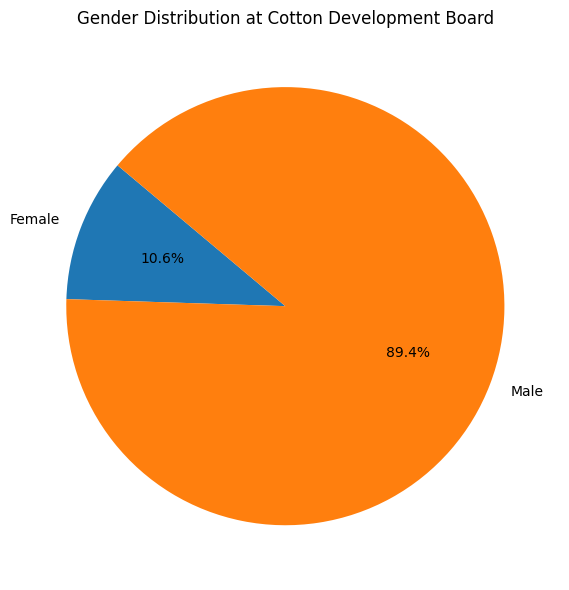

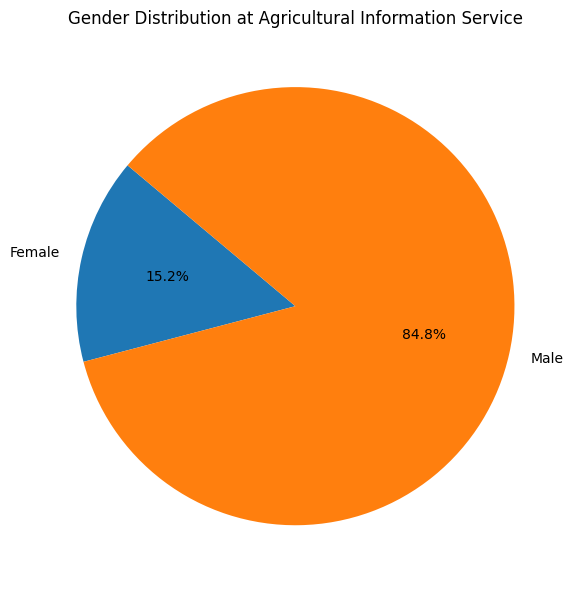

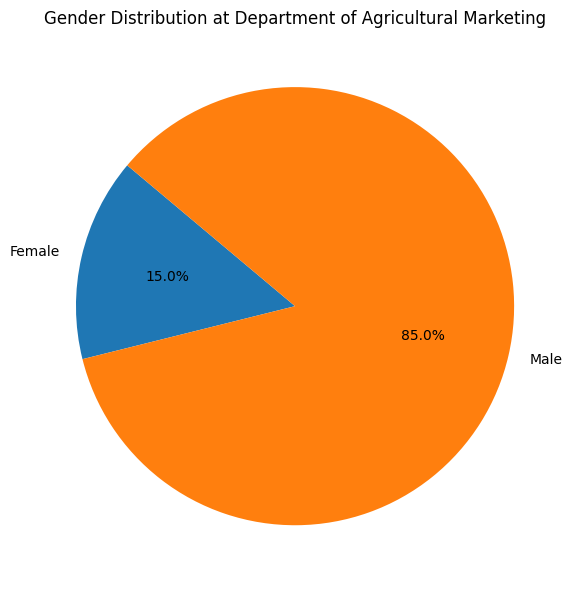

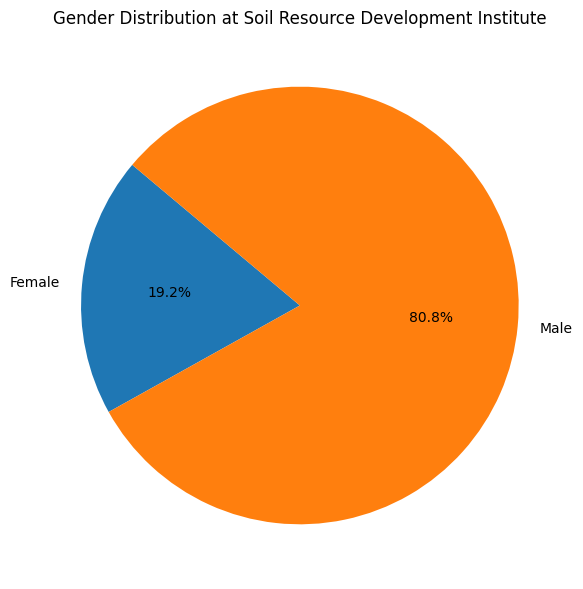

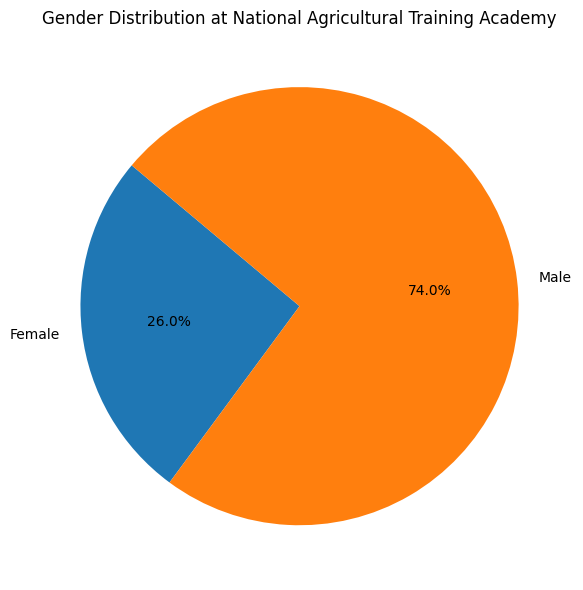

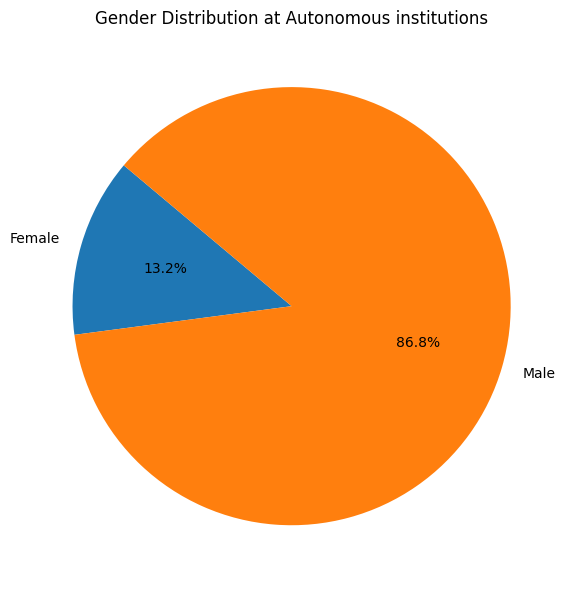

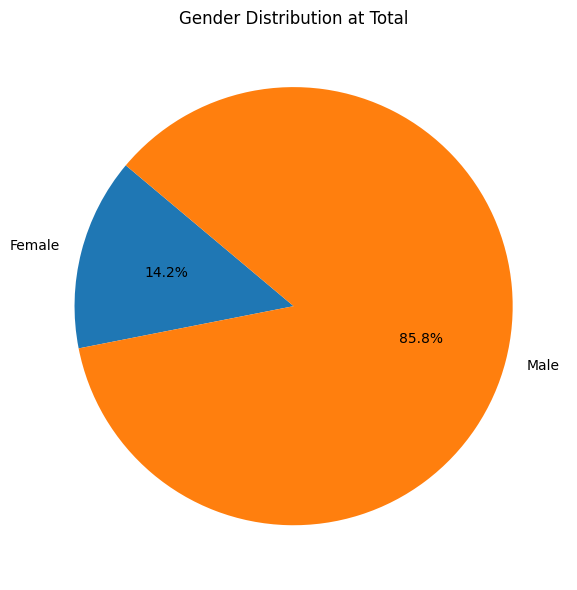

In [ ]:
for index, row in df.iterrows():
    office_name = row['Office name']
    female_percentage = row['Female Percentage']
    male_percentage = row['Male Percentage']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([female_percentage, male_percentage], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution at {office_name}')

    # Display the chart
    plt.tight_layout()
    plt.show()

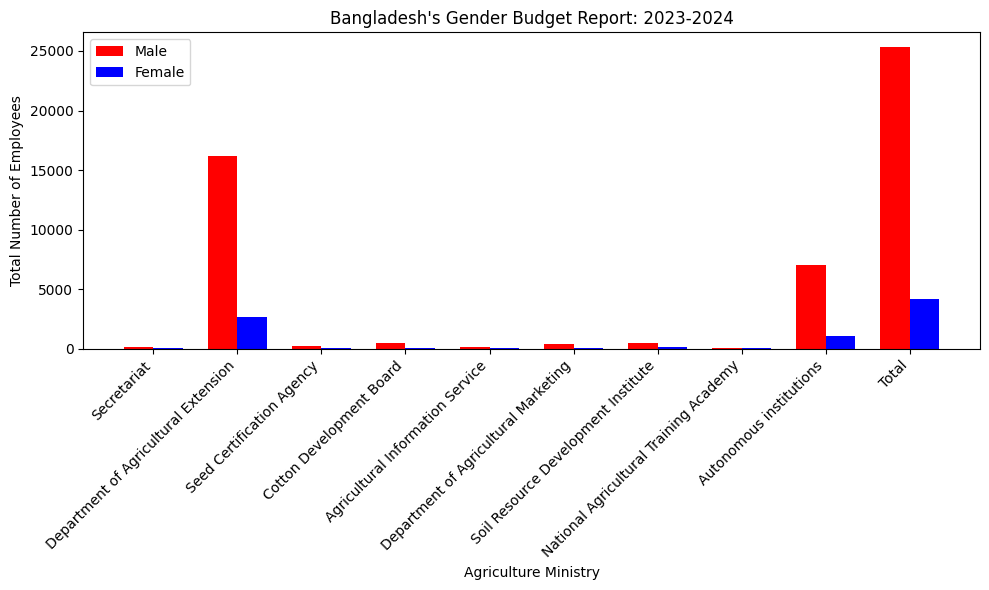

In [ ]:
# Define the positions for the bars
x = np.arange(len(df['Office name']))

# Define the width of each bar group
width = 0.35

# Create a bar chart with Male and Female bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Male'], width, label='Male', color='red')
bar2 = ax.bar(x + width/2, df['Female'], width, label='Female', color='blue')

# Add labels and a title
ax.set_xlabel('Agriculture Ministry')
ax.set_ylabel('Total Number of Employees')
ax.set_title("Bangladesh's Gender Budget Report: 2023-2024")

# Add a legend
ax.legend()

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['Office name'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

Ministry of Water Resources - page 114

In [ ]:
table_df = tabula.read_pdf(pdf_file_path, pages=114)[0]

In [ ]:
table_df.head()

,Office name,Total,Male,Female,Female Percentage
0,Ministry of Water Resources,111,91,20.0,18.0
1,Bangladesh Water Development Board,"6,184","5,439",745.0,12.1
2,Department of Bangladesh Haor and Wetlands,33,27,6.0,18.2
3,Development,NaN,NaN,NaN,NaN
4,Water Resources Planning Organization,103,93,10.0,9.7


In [ ]:
table_df = table_df.drop(index=3)

In [ ]:
table_df.shape

(7, 5)

In [ ]:
table_df.dtypes

Office name           object
Total                 object
Male                  object
Female               float64
Female Percentage    float64
dtype: object

In [ ]:
table_df.head()

,Office name,Total,Male,Female,Female Percentage
0,Ministry of Water Resources,111,91,20.0,18.0
1,Bangladesh Water Development Board,"6,184","5,439",745.0,12.1
2,Department of Bangladesh Haor and Wetlands,33,27,6.0,18.2
4,Water Resources Planning Organization,103,93,10.0,9.7
5,River Research Institute,172,148,24.0,14.0


In [ ]:
table_df['Total'] = table_df['Total'].str.replace(',', '').astype(int)
table_df['Male'] = table_df['Male'].str.replace(',', '').astype(int)


In [ ]:
table_df['Office name'] = table_df['Office name'].astype('string')

In [ ]:
table_df.dtypes

Office name           string
Total                  int64
Male                   int64
Female               float64
Female Percentage    float64
dtype: object

In [ ]:
df = pd.DataFrame(table_df)

In [ ]:
df['Male Percentage'] = 100 - df['Female Percentage']

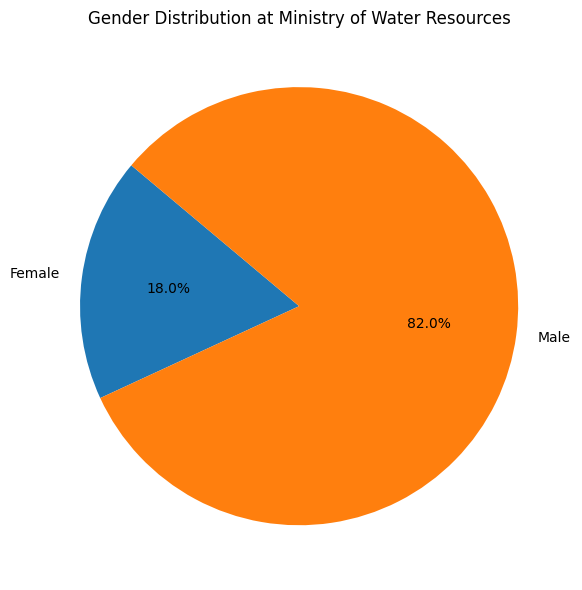

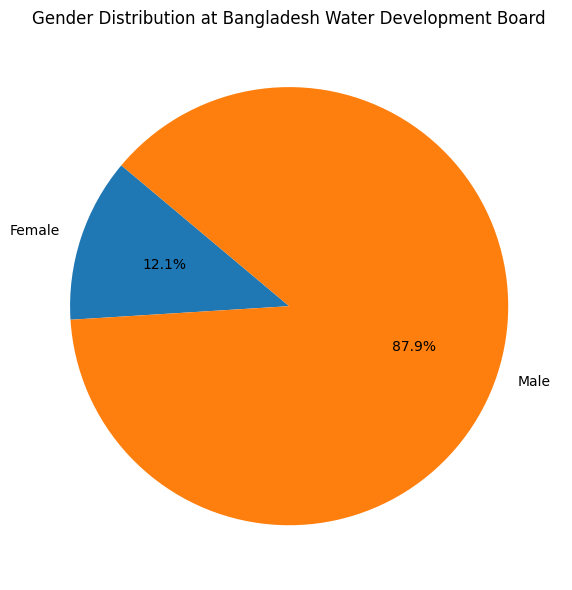

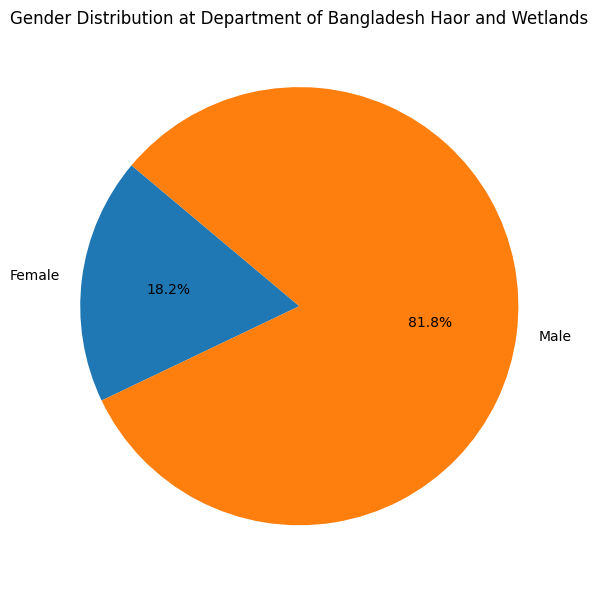

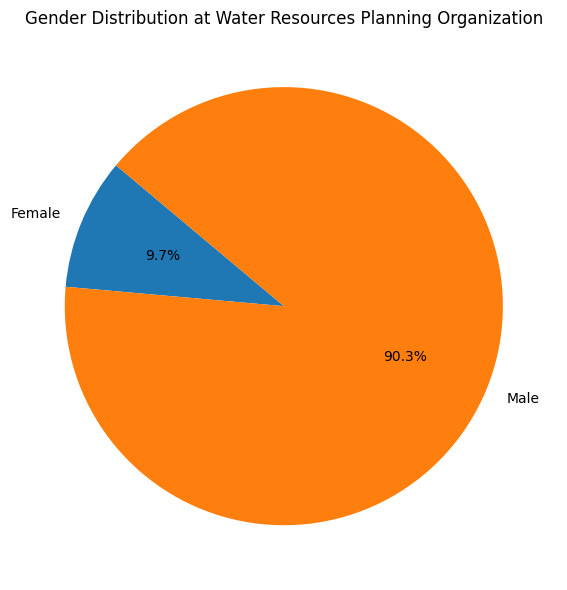

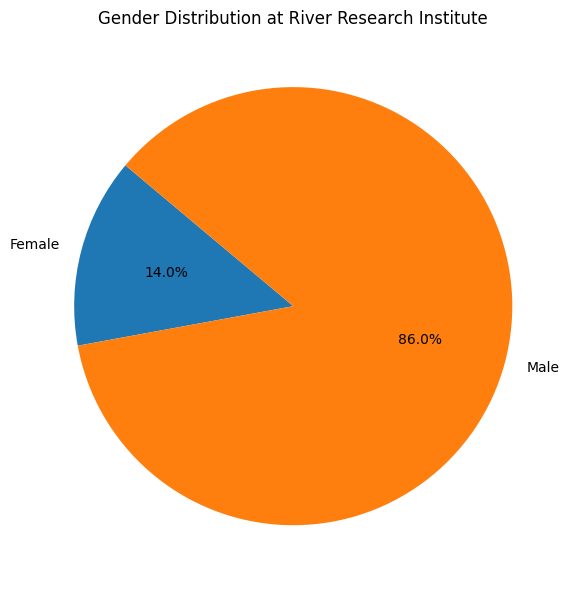

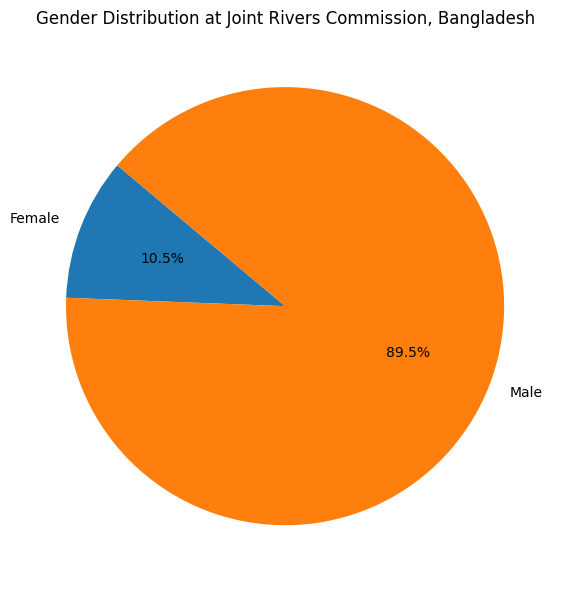

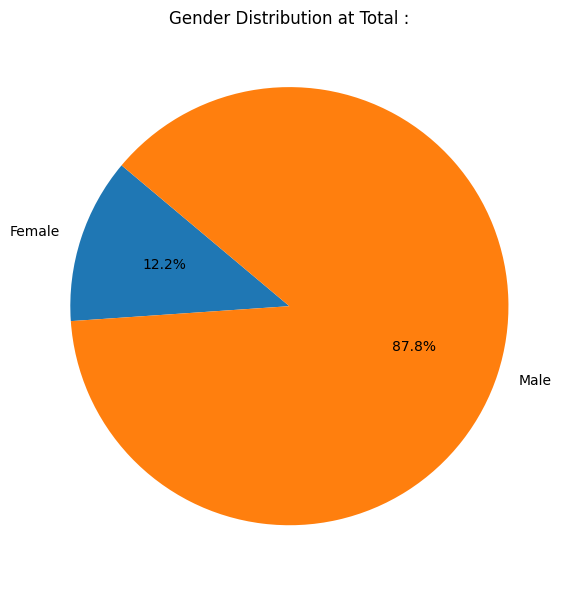

In [ ]:
for index, row in df.iterrows():
    office_name = row['Office name']
    female_percentage = row['Female Percentage']
    male_percentage = row['Male Percentage']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([female_percentage, male_percentage], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution at {office_name}')

    # Display the chart
    plt.tight_layout()
    plt.show()

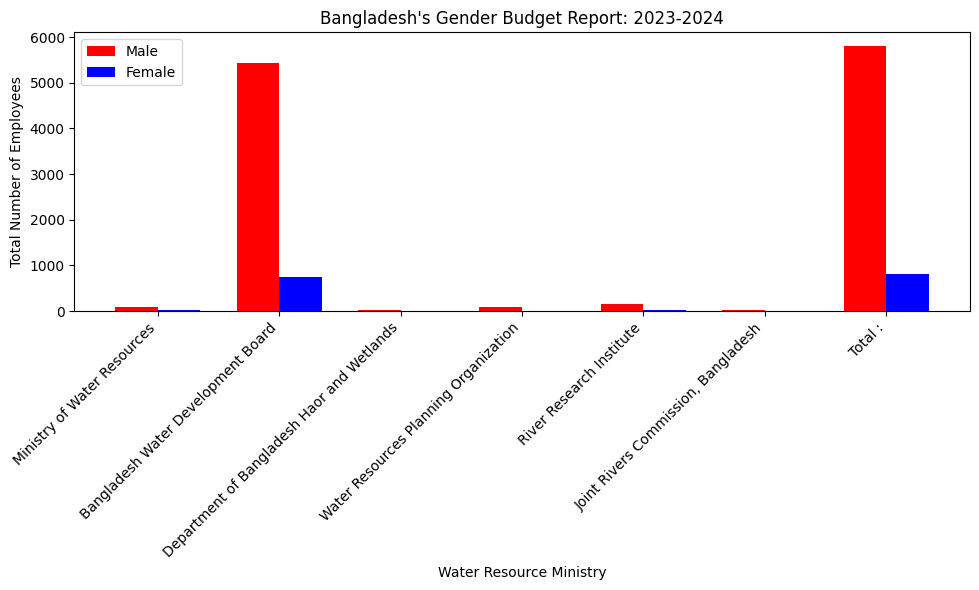

In [ ]:
# Define the positions for the bars
x = np.arange(len(df['Office name']))

# Define the width of each bar group
width = 0.35

# Create a bar chart with Male and Female bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Male'], width, label='Male', color='red')
bar2 = ax.bar(x + width/2, df['Female'], width, label='Female', color='blue')

# Add labels and a title
ax.set_xlabel('Water Resource Ministry')
ax.set_ylabel('Total Number of Employees')
ax.set_title("Bangladesh's Gender Budget Report: 2023-2024")

# Add a legend
ax.legend()

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['Office name'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

Ministry of Textiles and Jutes - page 107

In [ ]:
table_df = tabula.read_pdf(pdf_file_path, pages=107)[0]

In [ ]:
table_df.head()

,Office name,Unnamed: 0,Total,Unnamed: 1,Male,Unnamed: 2,Female,Unnamed: 3,Female Percentage
0,Secretariat,127,NaN,104,23,18.1,NaN,NaN,NaN
1,Department of Textiles,929,NaN,813,116,12.5,NaN,NaN,NaN
2,Department of Jute,690,NaN,585,105,15.2,NaN,NaN,NaN
3,Bangladesh Handloom Board,"1,562",NaN,"1,253",309,19.8,NaN,NaN,NaN
4,Bangladesh Sericulture Development Board,"1,047",NaN,440,607,58.0,NaN,NaN,NaN


In [ ]:
table_df.shape

(6, 9)

In [ ]:
table_df.dtypes

Office name           object
Unnamed: 0            object
Total                float64
Unnamed: 1            object
Male                  object
Unnamed: 2           float64
Female               float64
Unnamed: 3           float64
Female Percentage    float64
dtype: object

In [ ]:
# List of column names to remove
columns_to_remove = ['Total', 'Female','Unnamed: 3', 'Female Percentage']

# Remove the specified columns
table_df = table_df.drop(columns=columns_to_remove)

# List of column names to replace
column_mapping = {
    'Unnamed: 0': 'Total',
    'Unnamed: 1': 'Male',
    'Male': 'Female',
    'Unnamed: 2': 'Female percentage'
}

table_df.rename(columns=column_mapping, inplace=True)

In [ ]:
table_df.head()

,Office name,Total,Male,Female,Female percentage
0,Secretariat,127,104,23,18.1
1,Department of Textiles,929,813,116,12.5
2,Department of Jute,690,585,105,15.2
3,Bangladesh Handloom Board,"1,562","1,253",309,19.8
4,Bangladesh Sericulture Development Board,"1,047",440,607,58.0


In [ ]:
table_df.shape

(6, 5)

In [ ]:
table_df.dtypes

Office name           object
Total                 object
Male                  object
Female                object
Female percentage    float64
dtype: object

In [ ]:
table_df['Total'] = table_df['Total'].str.replace(',', '').astype(int)
table_df['Male'] = table_df['Male'].str.replace(',', '').astype(int)
table_df['Female'] = table_df['Female'].str.replace(',', '').astype(int)

In [ ]:
table_df['Office name'] = table_df['Office name'].astype('string')

In [ ]:
table_df.dtypes

Office name           string
Total                  int64
Male                   int64
Female                 int64
Female percentage    float64
dtype: object

In [ ]:
df = pd.DataFrame(table_df)

In [ ]:
df.dtypes

Office name           string
Total                  int64
Male                   int64
Female                 int64
Female percentage    float64
dtype: object

In [ ]:
df['Male percentage'] = 100 - df['Female percentage']

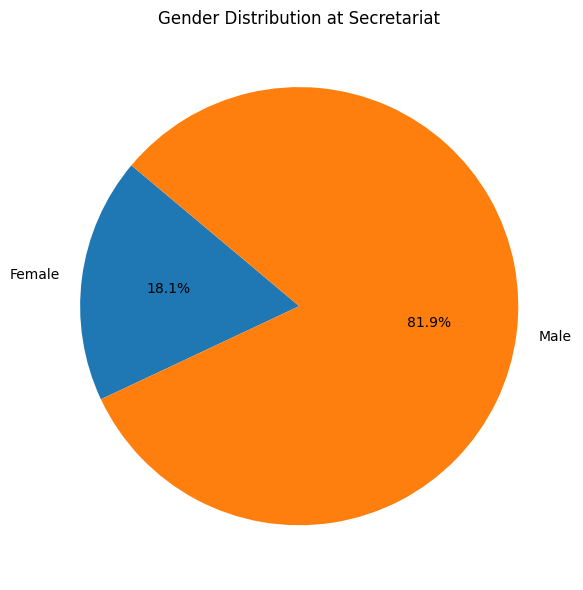

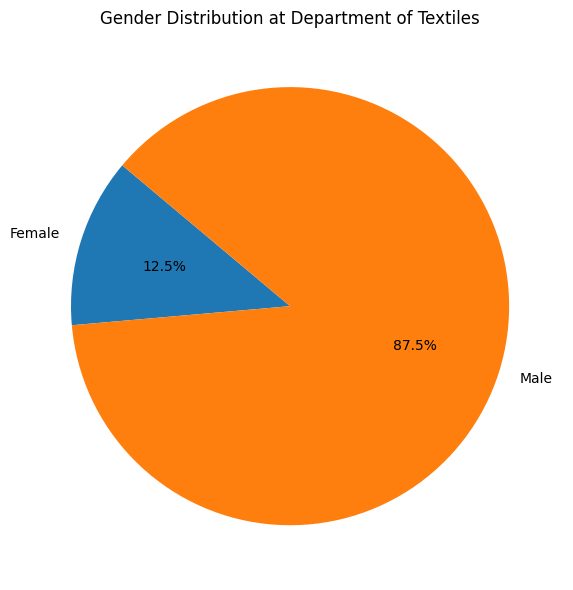

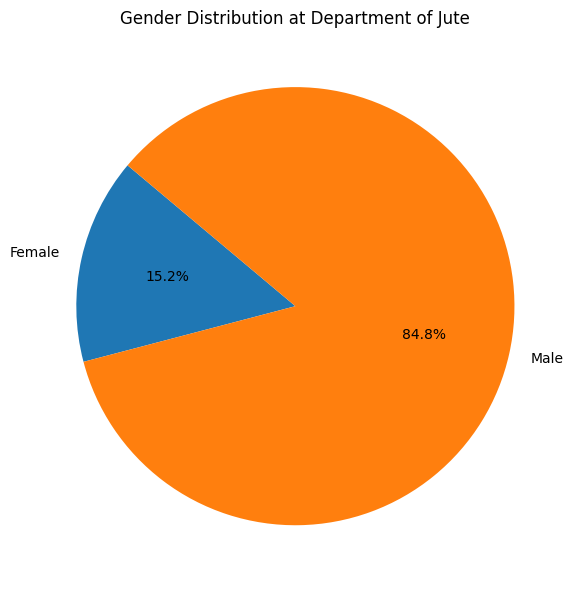

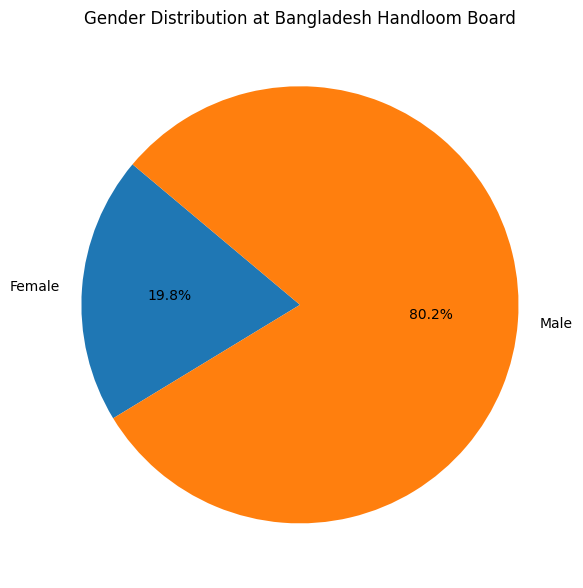

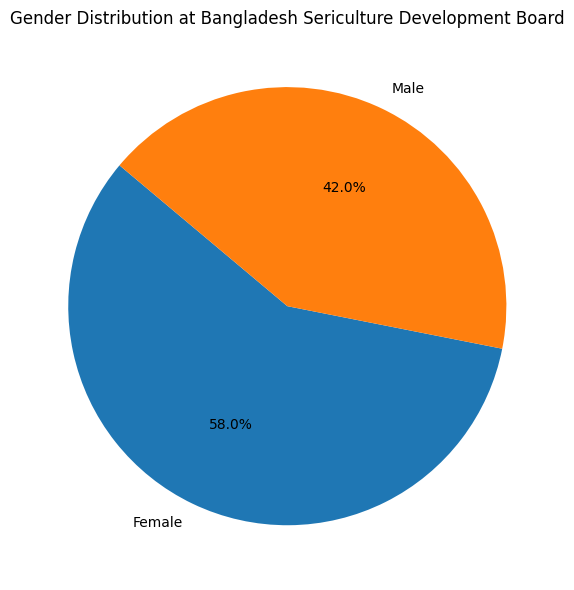

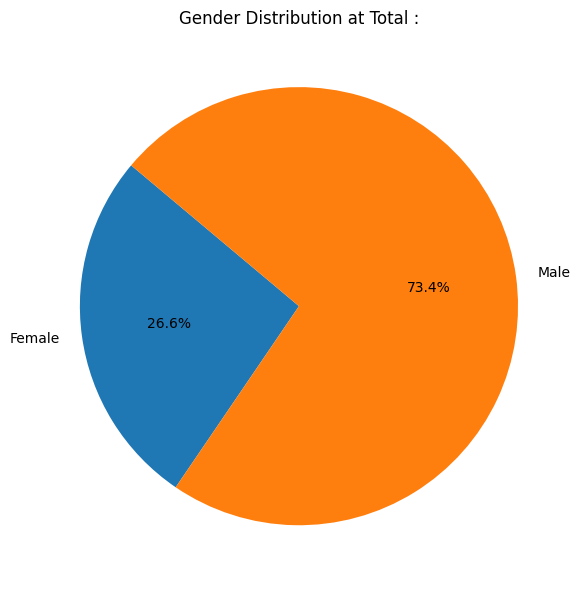

In [ ]:
for index, row in df.iterrows():
    office_name = row['Office name']
    female_percentage = row['Female percentage']
    male_percentage = row['Male percentage']

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie([female_percentage, male_percentage], labels=['Female', 'Male'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution at {office_name}')

    # Display the chart
    plt.tight_layout()
    plt.show()

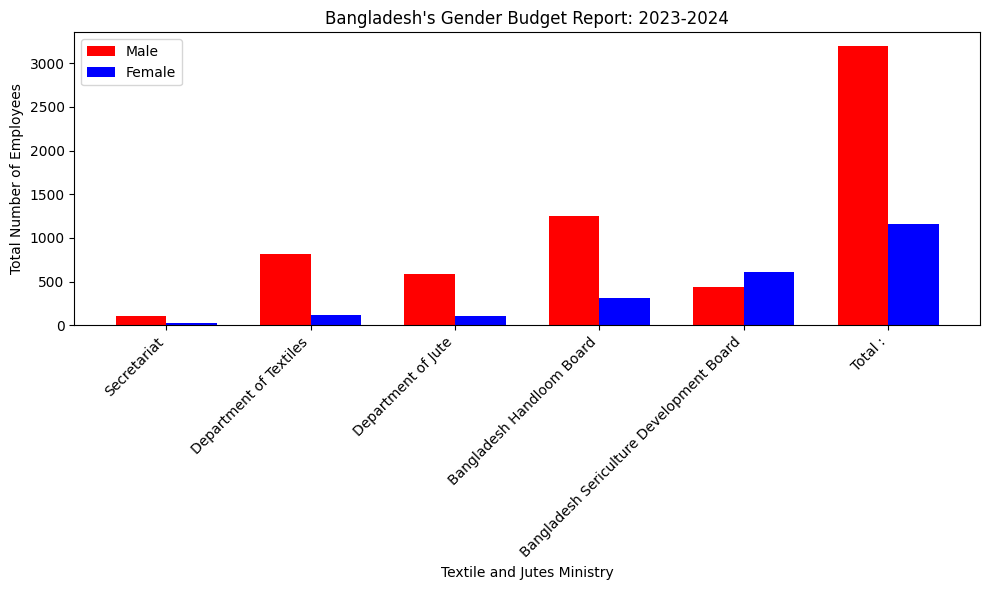

In [ ]:
# Define the positions for the bars
x = np.arange(len(df['Office name']))

# Define the width of each bar group
width = 0.35

# Create a bar chart with Male and Female bars side by side
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Male'], width, label='Male', color='red')
bar2 = ax.bar(x + width/2, df['Female'], width, label='Female', color='blue')

# Add labels and a title
ax.set_xlabel('Textile and Jutes Ministry')
ax.set_ylabel('Total Number of Employees')
ax.set_title("Bangladesh's Gender Budget Report: 2023-2024")

# Add a legend
ax.legend()

# Set x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['Office name'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()